In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Country-data1.csv")

In [3]:
X = df.drop(['country'],axis = 1)
names = df[['country']].copy()

In [4]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [5]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

# 2.) Pick two features to visualize acros

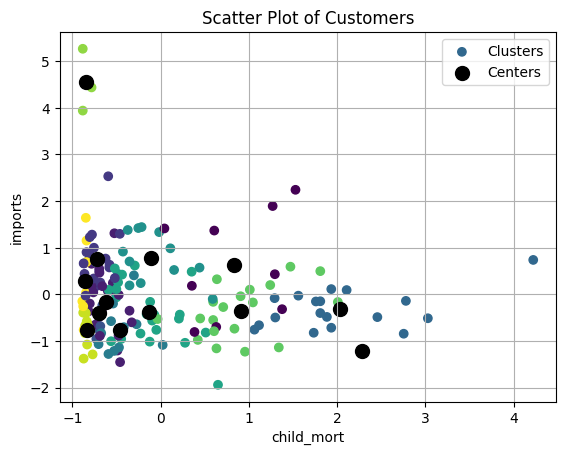

In [46]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 3


scatter = plt.scatter(X_scaled[:, x1_index],\
                      X_scaled[:, x2_index], c=kmeans.labels_, \
                      cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], \
                      kmeans.cluster_centers_[:, x2_index], \
                      marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means

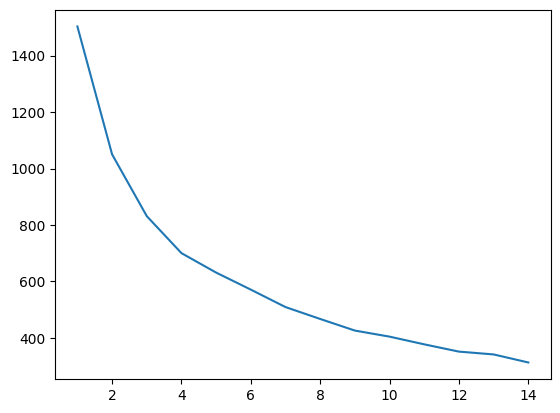

In [16]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30,init = "random")
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)
plt.plot(Ks, WCSSs)

In [ ]:
# Bonus Optional
WCSSs = [KMeans(n_clusters=k, n_init= 30,init = 'random')]

In [10]:
WCSSs

[1503.0,
 1050.2145582853307,
 831.4244352086876,
 700.3229986404376,
 631.4350499552105,
 563.8951855068483,
 521.5935816299896,
 467.6687197933595,
 423.858455136743,
 402.46931853527883,
 375.80689811776585,
 349.50352891223616,
 333.2983481926242,
 326.10893860178385]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

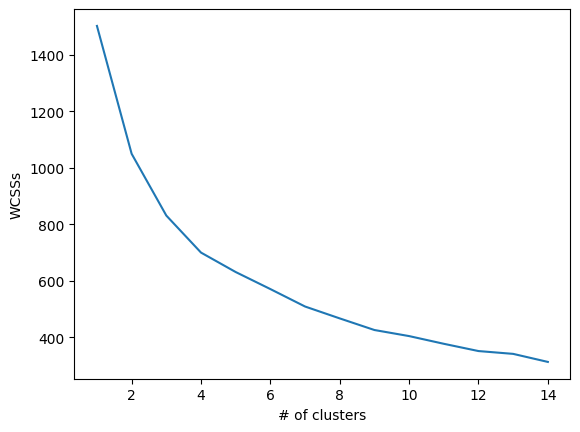

In [19]:
plt.plot(Ks, WCSSs)
plt.xlabel('# of clusters')
plt.ylabel('WCSSs')
plt.show()

# 6.) Do the same for a silhoutte plot

In [18]:
from sklearn.metrics import silhouette_score

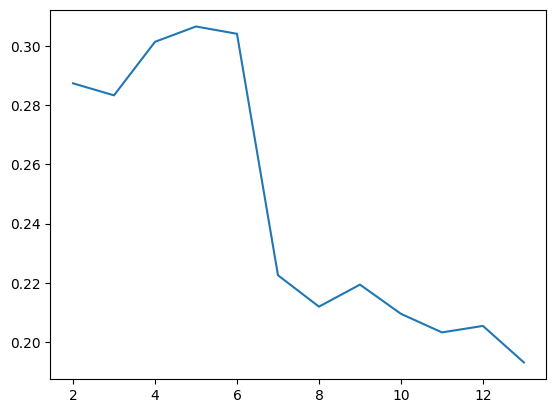

In [45]:
SCs = []
Ks = range(2,14)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30,init = "random")
    clustered_lables = kmeans.fit_predict(X_scaled)
    silhouette_ave = silhouette_score(X_scaled, clustered_lables)
    SCs.append(silhouette_ave)
plt.plot(Ks, SCs)

#7.) Create a list of the countries that are in each cluster. Write interesting things you notice

In [25]:
kmeans = KMeans(n_clusters=2,n_init=30, init ='random').fit(X_scaled)

In [28]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [29]:
output = pd.concat([preds,df],axis = 1)

In [31]:
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,1,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,0,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [35]:
output
print('Cluster 1: ')
list(output.loc[output[0]==0,'country'])

Cluster 1: 


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

In [36]:
output
print('Cluster 2: ')
list(output.loc[output[0]==1,'country'])

Cluster 2: 


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

#8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [37]:
output.groupby(0).mean()

<ipython-input-37-e9a27c4e94ce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [38]:
output.groupby(0).std()

<ipython-input-38-96ffda24b430>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).std()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


#9.) Write an observation about the descriptive statistics.

The child mortality rate is 12.16 for group 0, 76.28 for group 1. based on all the information given, we can tell that the countries that have lower child mortality rate have higher exports, inports and GPD, and have lower inflation rate, the residents have better health condition, higher income, and higher life expetency.